# Orbits and Geodesics with angular displacement

## General Python Overhead

### Libraries

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

### Constants

In [10]:
c = 1
M = 1000
G = 1

dr_BK = 1
dt_BK = 1

rcoord = np.arange(3,10)
tcoord = np.arange(3,10)
phicoord = np.linspace(0, 2*np.pi, np.shape(rcoord)[0]*4)

_pi_half = np.true_divide(np.pi, 2)
figure_size = (16,16)

dr_shell_res = 0.1
# r_start, r_stop = 3, 10
# rcoord = np.linspace(r_start, r_stop,num=int((r_stop-r_start)/dr_shell_res))

### Plot Info

In [11]:
general_plot_font = FontProperties()
general_plot_font.set_family('serif')
general_plot_font.set_name('Times New Roman')
general_plot_font.set_size(30)

axes_plot_font = FontProperties()
axes_plot_font.set_family('serif')
axes_plot_font.set_name('Times New Roman')
axes_plot_font.set_size(48)

math_plot_font = FontProperties()
math_plot_font.set_family('serif')
math_plot_font.set_name('Times New Roman')
math_plot_font.set_size(40)

plot_info = {
    "font" : {
        "general" : general_plot_font,
        "axes" : axes_plot_font,
        "math" : math_plot_font,
    },
}

## Angular Geodesic

#### Schwarzschild General:

In [12]:
def get_curvature_factor(r_coordinate):
    return np.sqrt(np.subtract(1, np.true_divide(2*M, np.multiply(r_coordinate, M))))

#### Satellite

This comes from the law of conservation of energy (Equation 3 from EBH). By solving $E/m=\left(1-\frac{2M}{r}\right) \frac{dt}{d\tau}$ for the satellite's wristwatch clock, $dt$, we obtain a function of proper time that describes the satellite's clock.

In [13]:
def get_satellite_dt(r_coordinate, energy_per_mass, dtau):
    return np.multiply(np.true_divide(energy_per_mass, np.power(get_curvature_factor(r_coordinate=r_coordinate), 2)), dtau)

Then, using the law of conservation of angular momentum (Equation 19, EBH), we find the change in $\phi$ coordinate for the satellite as a function of proper time.
$$\frac{d\phi}{d\tau} = \frac{\frac{L}{m}}{r^2}$$

In [14]:
def get_satellite_dphi(r_coordinate, angular_momentum_per_mass, dtau):
    return np.multiply(np.true_divide(angular_momentum_per_mass, np.power(r_coordinate, 2)), dtau)

### Shell Measurements

In [15]:
def dr_shell(r_coordinate):
    return np.true_divide(dr_BK, np.sqrt(np.subtract(1, np.true_divide(2*M, np.multiply(r_coordinate, M)))))

def dt_shell(r_coordinate):
    return np.multiply(dt_BK, np.sqrt(np.subtract(1, np.true_divide(2*M, np.multiply(r_coordinate, M)))))

### Plotting Functions

In [16]:
def create_orbital_figure(ax, satellite_phi, r_coordinates, plot_info, ):
    ax.set_title(plot_info['title'], fontproperties=plot_info['font']['axes'],)

    ax.set_xlabel(plot_info['x_axis']['label'], fontproperties=plot_info['font']['axes'], labelpad=20, loc='right')
    ax.set_xlim(plot_info['x_axis']['lim'])
    ax.set_xticks(plot_info['x_axis']['ticks'])
    ax.set_xticklabels(plot_info['x_axis']['tick_labels'], fontproperties=plot_info['font']['axes'],)

    ax.set_ylabel(plot_info['y_axis']['label'], fontproperties=plot_info['font']['axes'], labelpad=20)
    ax.set_ylim(plot_info['y_axis']['lim'])
    ax.set_yticks(plot_info['y_axis']['ticks'])
    ax.set_yticklabels(plot_info['y_axis']['tick_labels'], fontproperties=plot_info['font']['axes'],)

    ax.plot(satellite_phi, r_coordinates)
    return ax

# Orbits

## Circular

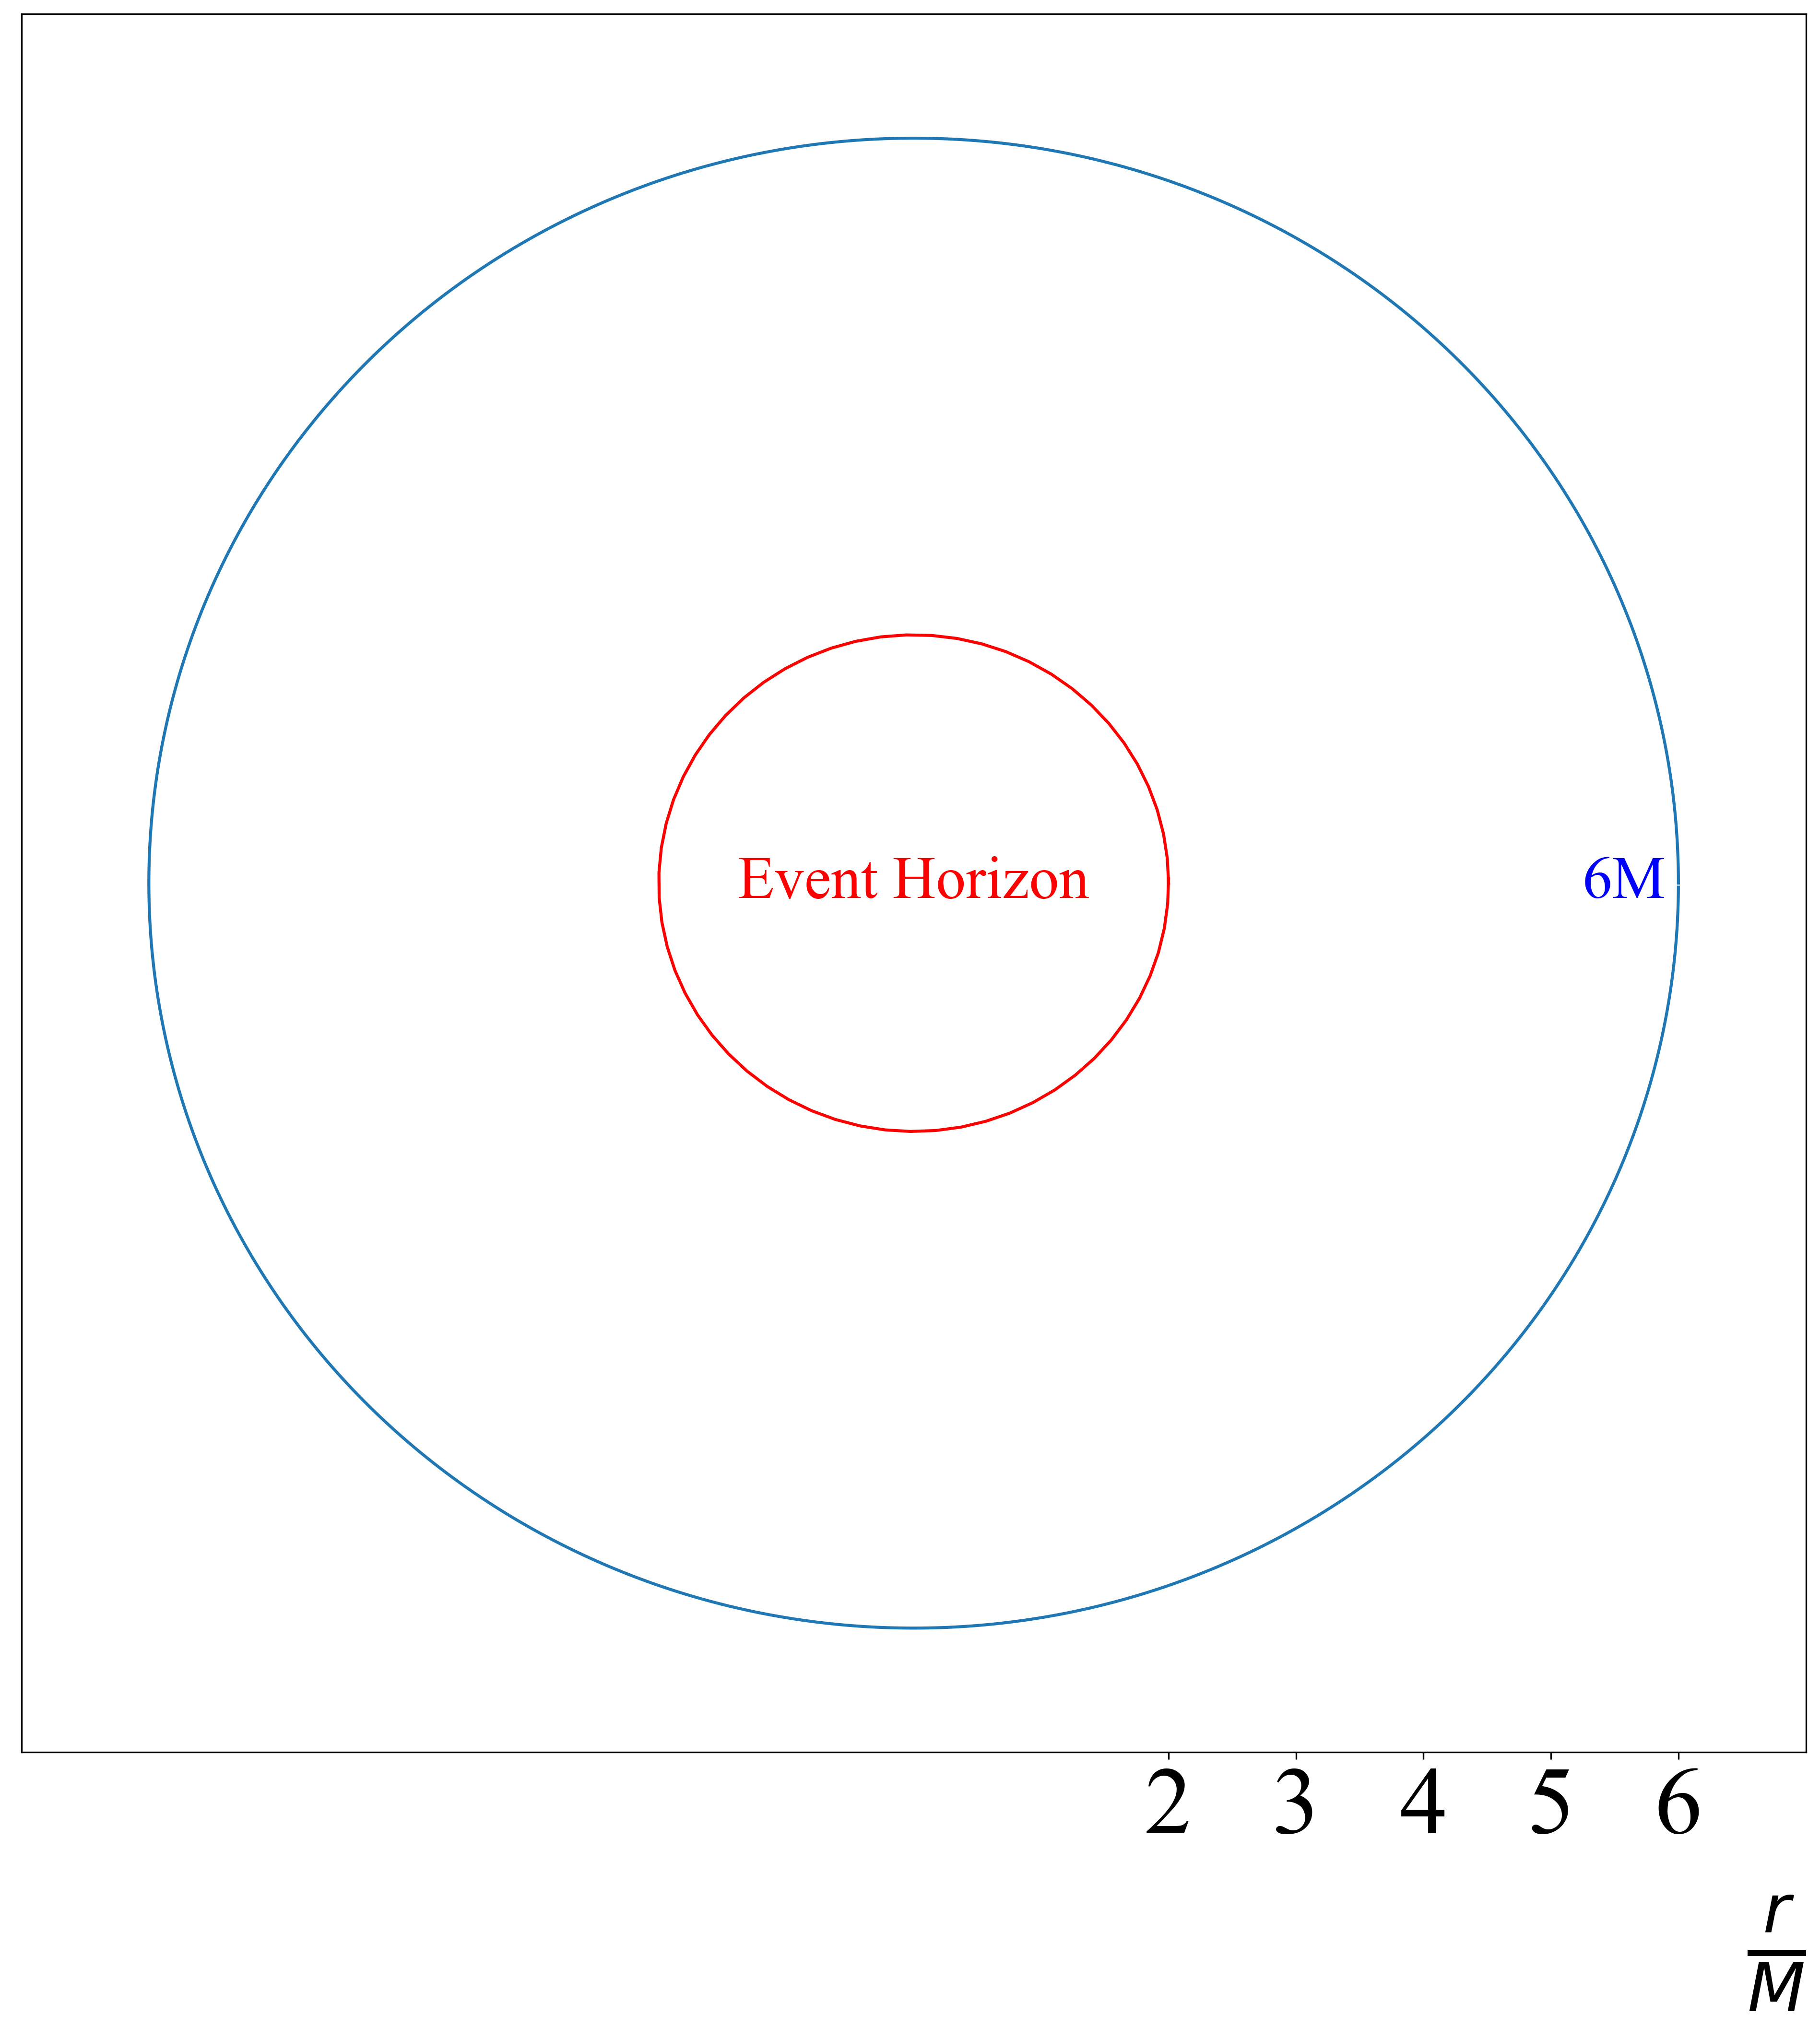

In [42]:
diagram = 'circular'

fig = plt.figure(figsize=figure_size, dpi=300)
ax_orbit = fig.add_subplot()

shell_radius = 6
limits = (-(shell_radius+1), (shell_radius+1))
ticks = np.arange(limits[0], limits[1]+1)

plot_info = {
    "title" : "",
    "x_axis" : {
        "label" : r"$\frac{r}{M}$",
        "lim" : limits,
        "ticks" : np.arange(2, limits[1]),
        "tick_labels" : [f'{int(tick)}' for tick in np.arange(2, limits[1])],
        "offset" : 0,
    },
    "y_axis" : {
        "label" : "",
        "lim" : limits,
        "ticks" : [ ],
        "tick_labels" : [ ],
        "offset" : 0,
    },
    "font" : {
        "general" : general_plot_font,
        "axes" : axes_plot_font,
        "math" : math_plot_font,
    },
}

dtau = 0.1
phi_orbit = np.arange(0, 2*np.pi, get_satellite_dphi(shell_radius, angular_momentum_per_mass=4, dtau=dtau))

satellite_x = shell_radius * np.cos(phi_orbit)
satellite_y = shell_radius * np.sin(phi_orbit)

ax_orbit = create_orbital_figure(ax_orbit, satellite_x, satellite_y, plot_info,)

# Mark Event Horizon
horizon_phi = np.arange(0,2*np.pi+dtau,dtau)

ax_orbit.plot(
    2 * np.cos(horizon_phi),
    2* np.sin(horizon_phi),
    color="red",
    linestyle="solid"
)
ax_orbit.text(
    0*np.cos(np.pi/4),
    0*np.sin(np.pi/4), 
    "Event Horizon", 
    color="red", 
    fontproperties=plot_info['font']['general'],  
    horizontalalignment='center', 
    verticalalignment='center'
)

# Annotate Orbit
ax_orbit.text(
    (shell_radius-dtau)*np.cos(np.pi/4*0),
    (shell_radius-dtau)*np.sin(np.pi/4*0), 
    f"{shell_radius}M", 
    color="blue", 
    fontproperties=plot_info['font']['general'],  
    horizontalalignment='right', 
    verticalalignment='center'
)

plt.savefig(f'oribtal_diagram_{diagram}_{shell_radius}M.jpg',bbox_inches='tight')

In [ ]:
# diagram = 'circular'


# x_offset = 1
# x_start = rcoord[0]
# y_ticks = length_contraction_factor.tolist()
# y_ticks = [length_contraction_factor[tick] for tick in np.arange(0, int((r_stop-r_start)/dr_shell_res), int(scale_factor/dr_shell_res))]

# if scale_factor >= 10:
#     x_offset = -scale_factor
#     x_start = scale_factor
#     y_ticks = [tick for tick in np.linspace(length_contraction_factor[0], 1, num=10)]

# fig = plt.figure(figsize=figure_size, dpi=300)
# ax_curvature = fig.add_subplot()

# plot_info = {
#     "title" : "",
#     "x_axis" : {
#         "label" : r"$\frac{r}{M}$",
#         "lim" : (x_offset, rcoord[-1]),
#         "ticks" : np.insert(np.arange(x_start,rcoord[-1]+1,scale_factor),0,2),
#         "tick_labels" : ['2'] + [f'{int(tick)}' for tick in np.arange(x_start,rcoord[-1]+1,scale_factor)],
#         "offset" : 0,
#     },
#     "y_axis" : {
#         "label" : "Gravitational Length Contraction Factor",
#         "lim" : (length_contraction_factor[0], 1.05),
#         "ticks" : [1,] + y_ticks,
#         "tick_labels" : ['1.00'] + [f"{tick:1.2f}" for tick in y_ticks],
#     },
#     "font" : {
#         "general" : general_plot_font,
#         "axes" : axes_plot_font,
#         "math" : math_plot_font,
#     },
# }

# ax_curvature = create_curvature_figure(ax_curvature, rcoord, length_contraction_factor, plot_info,)

# # Mark Event Horizon
# plt.axvline(
#     x=2,
#     color="red",
#     linestyle="solid"
# )
# ax_curvature.text(
#     1.9,
#     np.mean(y_ticks), 
#     "Event Horizon", 
#     color="red", 
#     fontproperties=plot_info['font']['axes'], 
#     rotation='vertical', 
#     horizontalalignment='right', 
#     verticalalignment='center'
# )

# # Mark Bookkeeper
# plt.axhline(
#     y=1,
#     color="black",
#     linestyle="dashed",
#     alpha=0.5,
# )
# ax_curvature.text(
#     0.6,
#     0.95, 
#     "No Gravitational Length Contraction", 
#     color="black", 
#     fontproperties=plot_info['font']['axes'], 
#     horizontalalignment='center', 
#     verticalalignment='top',
#     transform=ax_curvature.transAxes,
# )

# # Annotate Equation
# eqn = (r"$dr_{bk}=\sqrt{1-\frac{2M}{r_{shell}}}\ dr_{shell}$")
# ax_curvature.text(
#     (r_start*scale_factor+x_offset)/(r_stop+abs(x_offset)),
#     ((r_stop-r_start)/r_stop)/scale_factor,
#     eqn, 
#     color="C0", 
#     fontproperties=plot_info['font']['math'], 
#     horizontalalignment='left', 
#     verticalalignment='top',
#     transform=ax_curvature.transAxes,
# )

# eqn2 = (f"Resolution of {dr_shell_res} "+ r"$\frac{r}{M}$")
# ax_curvature.text(
#     0.99,
#     0.1,
#     eqn2,
#     color="black", 
#     fontproperties=plot_info['font']['general'], 
#     horizontalalignment='right', 
#     verticalalignment='top',
#     transform=ax_curvature.transAxes,
# )
# plt.savefig(f'curvature_diagram_{diagram}.jpg',bbox_inches='tight')